# GROUP 22: Project Proposal 
 
Seerat Ghai, Joey Su & Jade 

# Relationship Between Vancouver's Crime, Time, and Neighborhood

![vancouver Neighborhood Map](https://www.theunconventionalroute.com/wp-content/uploads/2018/10/correct-vancouver-neighborhood-map.png)
<br>Source: [Faith Wilson Group](https://faithwilson.com/vancouver-neighbourhoods/)

## Introduction

It appears to be a common perception that criminal activity happens after sunset. Parents advise children to avoid staying out late and media depicts certain neighborhoods to have higher rates of illegal activities. Why do crimes occur both when they do and where they are? According to one study<sup>1</sup>, there appears to be correlation between the time of day and both crime rate and severity of crimes. Using data from Vancouver Police Department, we set out to analyze crime data for 2022 across 6 neighborhoods in Vancouver to answer the following question:

<span style="color:blue">Is there a relationship between time and average severity of crime across 6 neighborhoods in Vancouver?</span>


In our study, we will define <span style="color:blue">severity of crime rates as our random variable</span>, the <span style="color:blue">mean as our location parameter</span>, and the <span style="color:blue">standard deviation as the scale parameter</span>. We choose the mean as the location parameter because the mean varies less than other measures of central tendency, and the standard deviation because like the mean, the standard deviation is stable with regard to sampling fluctuations. In addition, we use the level of standard deviation to assess whether there is a meaningful relationship (e.g. a low standard deviation would suggest that there is a stronger relationship to specific time of day). We will also check our data for any atypical extreme scores which could lead to misleading results.

Fear of crime can be a barrier to utilizing public spaces. One study<sup>2</sup> suggests that park ratings were lower for parks with high violent crime rates, which in turn has lead to fewer park visits. Another study<sup>3</sup> shows that criminal offenders appear to have temporal crime pattern. We hope that our findings can provide a rough framework of “safe” times and zones, prove to be valuable for improving crime analysis, as well as facilitate policies to reduce recidivism rates.

In [1]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library('dplyr')
library(gridExtra)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Preliminary Results

#### Reading Dataset 

In [17]:
url <- "https://raw.githubusercontent.com/SG0707/STAT-201-Group-project-/main/crimedata_csv_AllNeighbourhoods_2022.csv"
data <- read_csv(url)

Rows: 34189 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Cleaning & Wrangling Data

In [18]:
set.seed(5)
# Type is servrity of crimes, categorical variable
# mischief and theft(all) 1
# break and enter 2
# offense against a person/Vehicle Collision or Pedestrian Struck (with Injury)/homicide/Vehicle Collision or Pedestrian Struck (with Fatality)  3


for(i in 1:length(data$TYPE)){
  if(data$TYPE[i] %in% c("Mischief", "Other Theft", "Theft from Vehicle", "Theft of Bicycle", "Theft of Vehicle")) {data$TYPE[i] = 1}
  if(data$TYPE[i] %in% c("Break and Enter Commercial", "Break and Enter Residential/Other")) {data$TYPE[i] = 2}
  if(data$TYPE[i] %in% c("Offence Against a Person", "Vehicle Collision or Pedestrian Struck (with Injury)","Homicide", 
                         "Vehicle Collision or Pedestrian Struck (with Fatality)")) {data$TYPE[i] = 3}
}
data <- data %>% 
        rename(severity = TYPE)

head(data)

severity YEAR MONTH DAY HOUR MINUTE HUNDRED_BLOCK   NEIGHBOURHOOD X       
1 1        2022 7     31  21    0     19XX W 10TH AVE Kitsilano     489173.7
2 1        2022 8     16   0    0     19XX W 11TH AVE Kitsilano     489154.2
3 1        2022 4     17   0    0     19XX W 13TH AVE Kitsilano     489108.9
4 1        2022 1      4  23   30     19XX W 14TH AVE Kitsilano     489201.6
5 1        2022 9     15  23    0     19XX W 15TH AVE Kitsilano     489199.6
6 1        2022 7      6  15    0     19XX W 1ST AVE  Kitsilano     489216.8
  Y      
1 5456686
2 5456574
3 5456375
4 5456265
5 5456157
6 5457556

In [19]:
set.seed(15)

data <- data %>% 
select(severity, HOUR, NEIGHBOURHOOD)

clean_data <- data %>%
filter(NEIGHBOURHOOD %in% c("Kitsilano", "Arbutus Ridge", "Central Business District", 
                            "Hastings-Sunrise", "West End", "Kerrisdale"))  
clean_data$severity = as.numeric(as.character(clean_data$severity))
head(clean_data) 

severity HOUR NEIGHBOURHOOD
1 1        21   Kitsilano    
2 1         0   Kitsilano    
3 1         0   Kitsilano    
4 1        23   Kitsilano    
5 1        23   Kitsilano    
6 1        15   Kitsilano

#### Population Data 

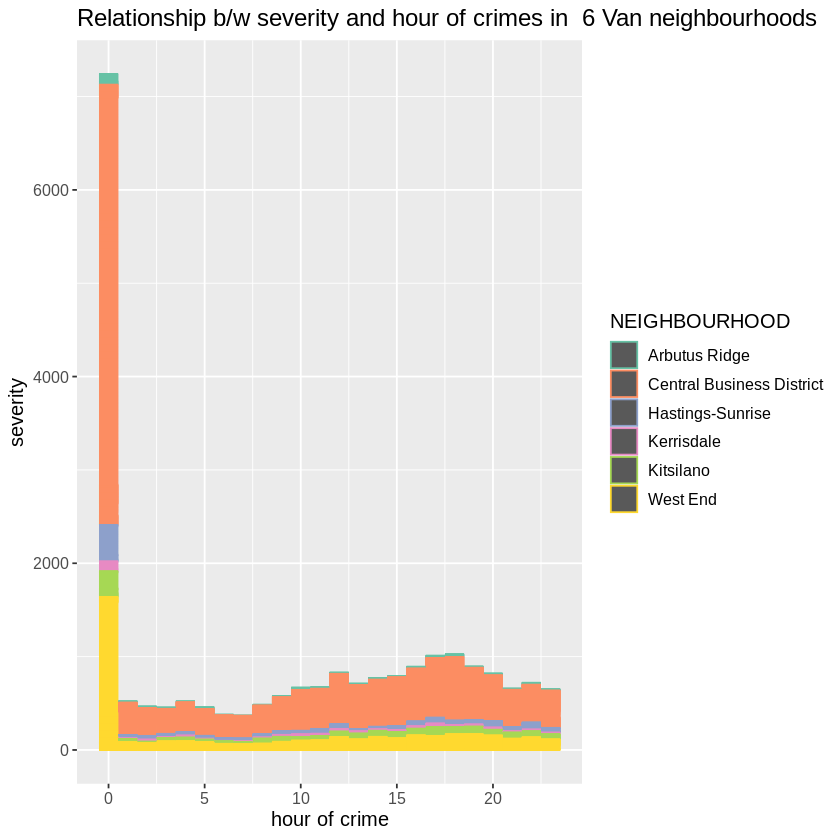

In [20]:
data_pop_dist <- ggplot(clean_data, aes( x = HOUR, 
                                        y = severity, 
                                       color = NEIGHBOURHOOD)) +
  geom_bar(stat = "identity") +
  labs(x = "hour of crime", y = "severity", fill = "neighborhood") +
  scale_color_brewer(palette = "Set2") +
  ggtitle("Relationship b/w severity and hour of crimes in  6 Van neighbourhoods") + 
  theme(text = element_text(size = 12))

data_pop_dist

In [21]:
pop_avg_severity <- clean_data %>%
summarise(avg = mean(severity)) %>%
as.numeric()

pop_avg_severity 

[1] 1.385606

In [22]:
set.seed(25)

mean_severity_per_hour <- clean_data %>%
    summarise(avg_severity_per_hour = pop_avg_severity/HOUR)

head(mean_severity_per_hour)

avg_severity_per_hour
1 0.06598126           
2        Inf           
3        Inf           
4 0.06024376           
5 0.06024376           
6 0.09237377

## Methods: Plan

1. Extract data from [Vancouver Police Department Crime Data](https://geodash.vpd.ca/opendata/). 
2. Categorize time periods.
3. Self-define severity of crimes.
4. Use the mean as a location parameter to calculate the central tendency.
5. Calculate standard deviation as a scale parameter to check if there are any outliers or significant variability in the data
6. Create a hypothesis and then test it.
7. Conduct a two-sample t-test to compare the mean severity of crimes during different periods of the day.
8. Set the significance level at 0.05 to determine if observed differences in means are statistically significant.
9. Calculate a 95% confidence interval for the mean severity of crimes during each period of the day using bootstrap and asymptotic methods.
10. Compare results of bootstrap and asymptotic methods.
11. Reflect on findings and discuss potential implications of a significant relationship between time of day and crime severity in Vancouver.



## References
1. [When Does Crime Occur Most: An In-depth Guide](https://www.vivint.com/resources/article/when-does-crime-occur-most) (non-scientific) 
2. [Effects of Crime Type and Location on Park Use Behavior](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7417020/) (scientific) 
3. [When Do Offenders Commit Crime? An Analysis of Temporal Consistency in Individual Offending Patterns](https://link.springer.com/article/10.1007/s10940-020-09470-w) (scientific) 